<a href="https://colab.research.google.com/github/roscibely/Financial-analysis/blob/main/Stock_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Candlestick Charts

## Bovespa Stocks Analysis

In [1]:
!pip install yfinance
!pip install mplfinance

The below code shows how to get data for ITSA4.SA from today to last month and plot the candlestick.

In [12]:
import plotly.graph_objects as go         # To plot the candlestick
import pandas as pd                       # structures and data analysis
import datetime as dt                     # 
import yfinance as yf                     # Yahoo! Finance market data downloader

actual_date = dt.date.today()             # Take the actual date
last_month_date = actual_date-dt.timedelta(days=30) 
actual_date = actual_date.strftime("%Y-%m-%d") 
last_month_date = last_month_date.strftime("%Y-%m-%d")

'''
Stock date ITSA4.SA
https://finance.yahoo.com/quote/ITSA4.SA?p=ITSA4.SA
'''
data = yf.download('ITSA4.SA', last_month_date, actual_date) # Getting data from Yahoo Finance

da= pd.DataFrame(data=data)
da.to_csv('file.csv')
df = pd.read_csv('file.csv')

print(df.head())

[*********************100%***********************]  1 of 1 completed
         Date   Open   High    Low  Close  Adj Close    Volume
0  2021-11-01  10.31  10.60  10.31  10.51  10.346408  30190700
1  2021-11-03  10.44  10.74  10.43  10.60  10.435007  36321500
2  2021-11-04  10.66  10.69  10.19  10.25  10.090455  36727000
3  2021-11-05  10.36  10.38  10.02  10.17  10.011700  51466400
4  2021-11-08  10.16  10.28  10.07  10.15   9.992011  23397100


In [13]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## Daily returns

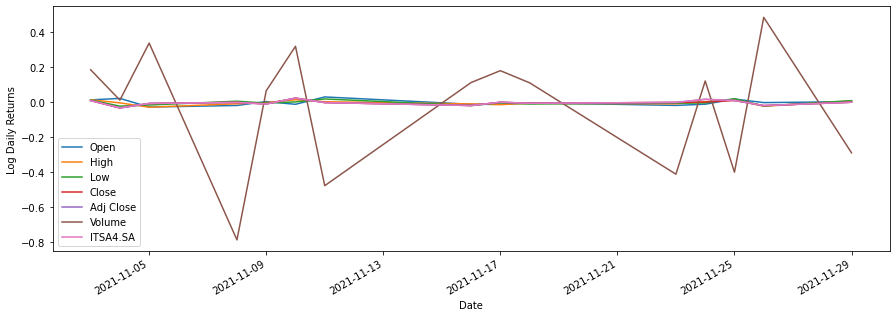

In [15]:
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np

prices=da
prices['ITSA4.SA']=wb.DataReader('ITSA4.SA', data_source='yahoo')['Adj Close']

log_returns=np.log(prices/prices.shift(1))
log_returns.plot(figsize=(15,5))
plt.ylabel('Log Daily Returns')
plt.xlabel('Date')
plt.show()

## Stock and stock index

[*********************100%***********************]  1 of 1 completed


/home/lukas/anaconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




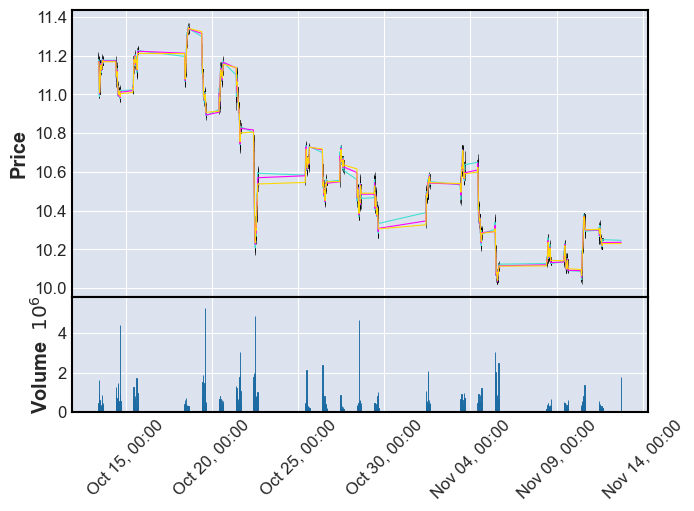

In [21]:
import mplfinance as mpf

data = yf.download(tickers='ITSA4.SA', start=dt.datetime(2021, 10, 12), end=dt.datetime(2021, 11, 13), interval="5m")
mpf.plot(data,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)
